In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [26]:
x = np.linspace(0,9,num=10)
y = np.linspace(0,9,num=10)
x = np.append(x,10)
y = np.append(y,15)
x = np.append(x,12).reshape((-1, 1))
y = np.append(y,20)

x_norm = x.reshape(len(x))

In [30]:
model = LinearRegression()
model.fit(x, y)

b1 = model.coef_
b0 = model.intercept_

print('intercept:', b0)
print('slope:', b1)

intercept: -1.5626681011296428
slope: [1.4739107]


In [31]:
y_reg = b1*x+b0

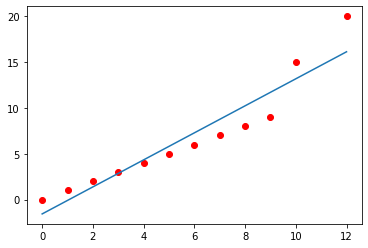

In [33]:
plt.plot(x_norm, y, 'ro')
plt.plot(x_norm,y_reg)
plt.show()

In [63]:
def line(b0, b1, x):
    return b1*x+b0

In [64]:
def distance(x0, y0, b0, b1, f):

    x1 = np.random.randint(0,5)
    x2 = np.random.randint(5,10)

    y1 = f(b0,b1,x1)
    y2 = f(b0,b1,x2)

    return (abs((x2-x1)*(y1-y0) - (x1-x0)*(y2-y1)) / np.sqrt(np.square(x2-x1) + np.square(y2-y1)))[0]

In [44]:
distance(2, 0, b0, b1, line)

0.7776837051051155

In [113]:
def train(samples, batch_size = 3, itter = 10):

    b0_best = 0
    b1_best = 0

    avg_dist_best = math.inf

    unzip_samples = list(zip(*samples))
    x = np.array(unzip_samples[0])
    y = np.array(unzip_samples[1])

    len_samples = len(samples)
    sample_indices = list(range(len_samples))

    for _ in range(itter):
        #batches gen
        batch_indices = np.random.choice(sample_indices,batch_size).tolist()

        x_batch = x[batch_indices]
        y_batch = y[batch_indices]

        #least square distance method
        model = LinearRegression()
        model.fit(x_batch.reshape((-1, 1)), y_batch)

        b1 = model.coef_
        b0 = model.intercept_

        #count average distance
        distances = []
        
        for i in range(len_samples):
            distances.append(distance(x[i], y[i], b0, b1, line))
        
        avg_dist = np.average(distances)

        if avg_dist < avg_dist_best:
            avg_dist_best = avg_dist
            b0_best = b0
            b1_best = b1

    
    return b0_best, b1_best


In [56]:
samples = zip(x_norm,y)
samples = list(samples)
samples

[(0.0, 0.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (3.0, 3.0),
 (4.0, 4.0),
 (5.0, 5.0),
 (6.0, 6.0),
 (7.0, 7.0),
 (8.0, 8.0),
 (9.0, 9.0),
 (10.0, 15.0),
 (12.0, 20.0)]

In [57]:
list(zip(*samples))

[(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0),
 (0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 15.0, 20.0)]

In [78]:
distance(x_norm[5], y[5], b0, b1, line)

0.4530196340418153

In [100]:
type(x)

numpy.ndarray

In [114]:
b0_ransac, b1_ransac = train(samples)
print(b0_ransac)
print(b1_ransac)

0.0
[1.]


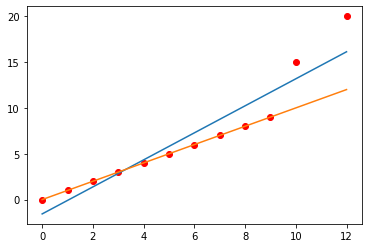

In [115]:
y_ransac = b1_ransac*x+b0_ransac

plt.plot(x_norm, y, 'ro')
plt.plot(x_norm,y_reg)
plt.plot(x_norm,y_ransac)
plt.show()